In [2]:
# Regularization 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
# regularization methos
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

In [3]:
data = pd.read_csv('LinReg.csv')
X = data.drop('output',axis=1).values
Y = data['output']

m,n = X.shape
shuffle = np.random.permutation(np.arange(m))
X,Y = X[shuffle], Y[shuffle]
X_train = X[0:int(0.6*m),:]
Y_train = Y[0:int(0.6*m)]
X_dev = X[int(0.6*m):int(0.8*m),:]
Y_dev = Y[int(0.6*m):int(0.8*m)]
X_test = X[int(0.8*m):,:]
Y_test = Y[int(0.8*m):] 


In [4]:
def RMSE(output, prediction):
    return np.sqrt(np.mean((output-prediction)**2))

#scaling
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_dev_scaled = scaler.transform(X_dev)
X_test_scaled = scaler.transform(X_test)

poly = preprocessing.PolynomialFeatures(degree=4, include_bias=False)
#T = np.arange(12).reshape((6,2))
#print(poly.fit_transform(T))

X_train_scaled_d2 = poly.fit_transform(X_train_scaled)
X_dev_scaled_d2 = poly.fit_transform(X_dev_scaled)
X_test_scaled_d2 = poly.fit_transform(X_test_scaled)


In [5]:
#L2 regularization and its effect on coefficients (with Linear Regression)
rl = Ridge(alpha=1)
rl.fit(X_train_scaled_d2,Y_train)
preds = rl.predict(X_dev_scaled_d2)
print(len(rl.coef_))

34


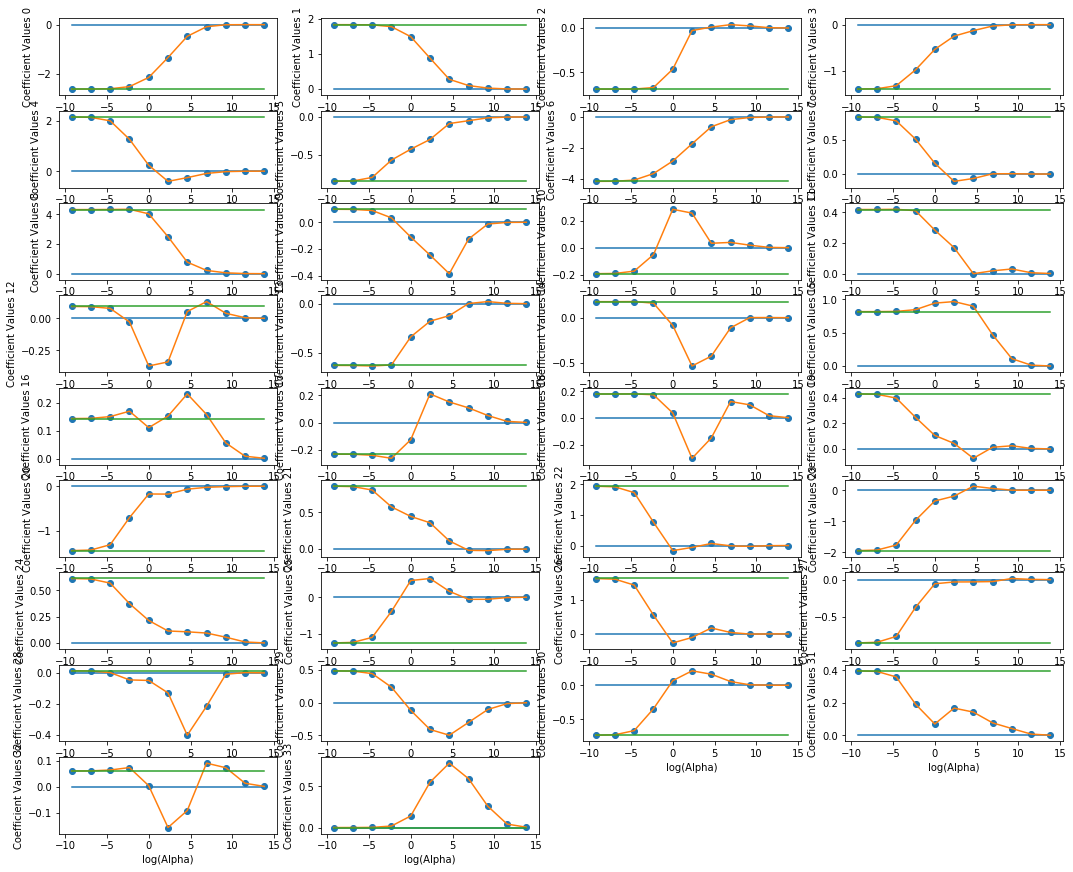

In [15]:
#experiment in regards to the change of the coefficients for diff alpha
alpha_vec = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000,1e5,1e6]
coef_val = np.zeros(len(alpha_vec))
lm_coef_line = np.zeros(len(alpha_vec))

lm = LinearRegression()
lm.fit(X_train_scaled_d2, Y_train)
preds = lm.predict(X_dev_scaled_d2)
lm_dev_rmse = RMSE(Y_dev, preds)

fig = plt.figure(figsize = (18,15))
rm_dev_rmse_vec = []
lm_dev_rmse_vec = []
nn = len(lm.coef_)
nn_count = 0

# finding hoe coeffs change for different regularization parameters
for idx in range(nn):
    nn_count += 1
    for aa_idx, aa in enumerate(alpha_vec):
        rm = Ridge(alpha=aa)
        rm.fit(X_train_scaled_d2,Y_train)
        rm_coef = rm.coef_[idx]
        lm_coef = lm.coef_[idx]
        
        coef_val[aa_idx] = rm_coef
        lm_coef_line[aa_idx] = lm_coef
        
        if idx == 0:
            preds = rm.predict(X_dev_scaled_d2)
            rm_dev_rmse = RMSE(Y_dev, preds)
            rm_dev_rmse_vec.append(rm_dev_rmse)
            lm_dev_rmse_vec.append(lm_dev_rmse)
    
    ax = fig.add_subplot(int(nn/4)+1,4, nn_count)
    ax.plot(np.log(alpha_vec), lm_coef_line * 0)    
    ax.plot(np.log(alpha_vec), coef_val)
    ax.plot(np.log(alpha_vec), lm_coef_line)
    ax.scatter(np.log(alpha_vec), coef_val)
    ax.set_ylabel('Coefficient Values '+str(nn_count-1))
    ax.set_xlabel('log(Alpha)') 
plt.show()  
    

